In [ ]:
import pandas as pd
from conf import DATA_DIR, ASSETS_DIR
from utils import compute_cohen_on_pandas_columns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
onion_bin_to_compare = pd.read_csv(DATA_DIR + 'onion_bin_to_compare.csv')
emma_bin_to_compare = pd.read_csv(DATA_DIR + 'emma_bin_to_compare.csv')

onion_to_compare = pd.read_csv(DATA_DIR + 'onion_to_compare.csv')
emma_to_compare = pd.read_csv(DATA_DIR + 'emma_to_compare.csv')

In [3]:
gems_9 = ['wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener', 'sadn', 'tens']

Emotion-wise Cohen's Kappa

In [4]:
onion_bin_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
0,6aKbiXwwBszPw6HM,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Find (Andy Moor Remix),Ridgewalkers,trance
1,EtYe8YWsGvZmeRYM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alchemy,Above & Beyond,trance
2,04q3VppIQEET5rzy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
3,8BjY1ZEA6OnEoUYk,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,R.I.P.,September,trance
4,jyMudL0rTgO4ecto,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Build The Cities (feat. Kerli),Karma Fields,trance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,x9iYvZSa8hQpBgHJ,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Tropicalia,Beck,nova
449,2RgPyroR10XSHhEt,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Mas, Que Nada!",Jorge Ben Jor,nova
450,y1Vp4R9jiSUAVnMP,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Agua De Beber,Astrud Gilberto,nova
451,x2aYFIYlehHBrA32,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Know You Now,Amy Winehouse,nova


In [5]:
onion_bin_to_compare[onion_bin_to_compare.song_code == song_code][gems_row].values == 1.

NameError: name 'song_code' is not defined

In [ ]:
confusion_matrix = np.zeros(shape=(9, 9))
for row, gems_row in enumerate(gems_9):
    for column, gems_column in enumerate(gems_9):
        for song_code in onion_bin_to_compare.song_code.values:
            if onion_bin_to_compare[onion_bin_to_compare.song_code == song_code][gems_row].values == 1:
                if emma_bin_to_compare[emma_bin_to_compare.song_code == song_code][gems_column].values == 1:
                    confusion_matrix[row, column] += 1

In [6]:
confusion_matrix

NameError: name 'confusion_matrix' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(confusion_matrix, linewidth=0.5, annot=True, fmt='g')
plt.show()

Kendall Tau over individual tracks

In [32]:
emma_to_compare = emma_to_compare.set_index('song_code')[gems_9]
onion_to_compare = onion_to_compare.set_index('song_code')[gems_9]

In [42]:
onion_to_compare.loc['2Ow0RJHAUNUBDwIq']

wond    0.000000
tran    0.805714
tend    0.040000
nost    0.022857
peac    0.131429
joya    0.000000
ener    0.000000
sadn    0.000000
tens    0.000000
Name: 2Ow0RJHAUNUBDwIq, dtype: float64

In [44]:
emma_to_compare.loc['2Ow0RJHAUNUBDwIq']

wond    0.104292
tran    0.085090
tend    0.166039
nost    0.138931
peac    0.222515
joya    0.132907
ener    0.052711
sadn    0.051958
tens    0.045557
Name: 2Ow0RJHAUNUBDwIq, dtype: float64

In [53]:
kt_dict = {
    song_code: np.nan for song_code in onion_bin_to_compare.song_code.values
}

In [60]:
for song_code in onion_bin_to_compare.song_code.values:
    profile_emma = emma_to_compare.loc[song_code]
    profile_onion = onion_to_compare.loc[song_code]
    kt = profile_emma.corr(profile_onion, method='kendall', min_periods=None)
    
    kt_dict[song_code] = kt

In [68]:
kt_values = np.array(list(kt_dict.values()))

In [69]:
kt_values

array([ 0.06537205,  0.47140452,  0.47809144,  0.52372294,  0.35355339,
        0.35355339,  0.47140452,  0.35355339,  0.35355339,  0.47140452,
       -0.25458754,  0.19611614,  0.47336463,  0.47140452,  0.30270276,
       -0.26726124,  0.10910895,  0.11785113,  0.55943093,  0.06085806,
        0.25458754, -0.21971769,  0.03636965,  0.55943093,  0.47140452,
       -0.2236068 ,  0.06537205,  0.06537205,  0.56666667, -0.03636965,
        0.59628479,  0.4454354 ,  0.0745356 ,  0.30123204,  0.2245251 ,
       -0.11785113,  0.4454354 ,  0.47336463,  0.64549722,  0.40006613,
        0.        ,  0.36666667,  0.19611614,  0.39223227,  0.38729833,
        0.10425721,  0.34020691,  0.52297636, -0.4023399 ,  0.62360956,
        0.55943093,  0.16666667,  0.33946737,  0.52613679,  0.372678  ,
        0.0745356 ,  0.55124591,  0.32686023,  0.21516574,  0.26892644,
       -0.47140452,  0.4454354 ,  0.64549722,  0.24343225,  0.12909944,
        0.34044145, -0.11785113, -0.08908708,  0.4868645 , -0.17

In [71]:
kt_values.min(), kt_values.max(), kt_values.mean(), kt_values.std()

(-0.6333333333333333,
 0.7298004491997617,
 0.20953049103403484,
 0.26211420732073276)

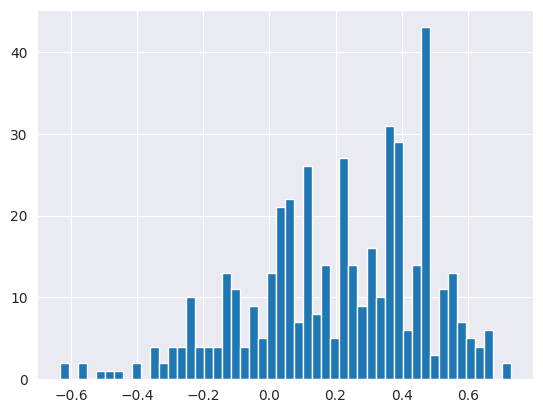

In [73]:
n, bins, patches = plt.hist(kt_values, bins=50)
plt.show()